In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [3]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df["bmi"].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


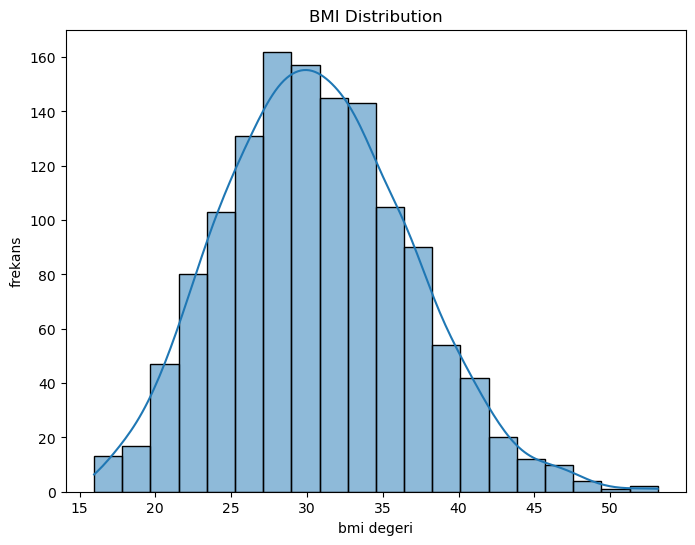

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sn.histplot(df["bmi"],bins=20,kde=True)
plt.xlabel("bmi degeri")

plt.ylabel("frekans")
plt.title("BMI Distribution")
plt.show()

In [17]:
print("BMI Ortalama: ", df["bmi"].mean())
print("BMI Medyan: ", df["bmi"].median())
print("BMI Mod: ", df["bmi"].mode())

BMI Ortalama:  30.66339686098655
BMI Medyan:  30.4
BMI Mod:  0    32.3
Name: bmi, dtype: float64


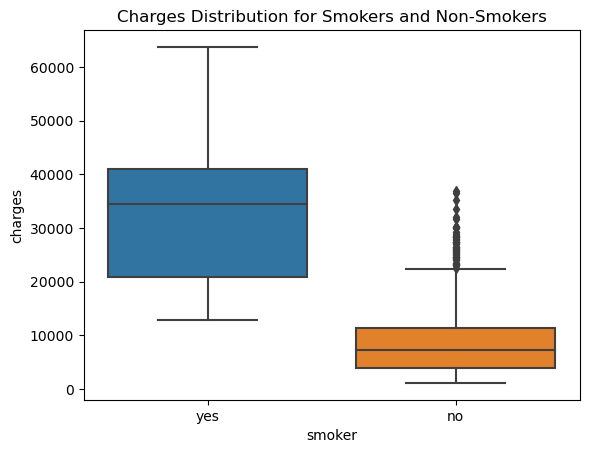

In [20]:
sn.boxplot(data=df, x="smoker", y="charges")
plt.title("Charges Distribution for Smokers and Non-Smokers")
plt.show()

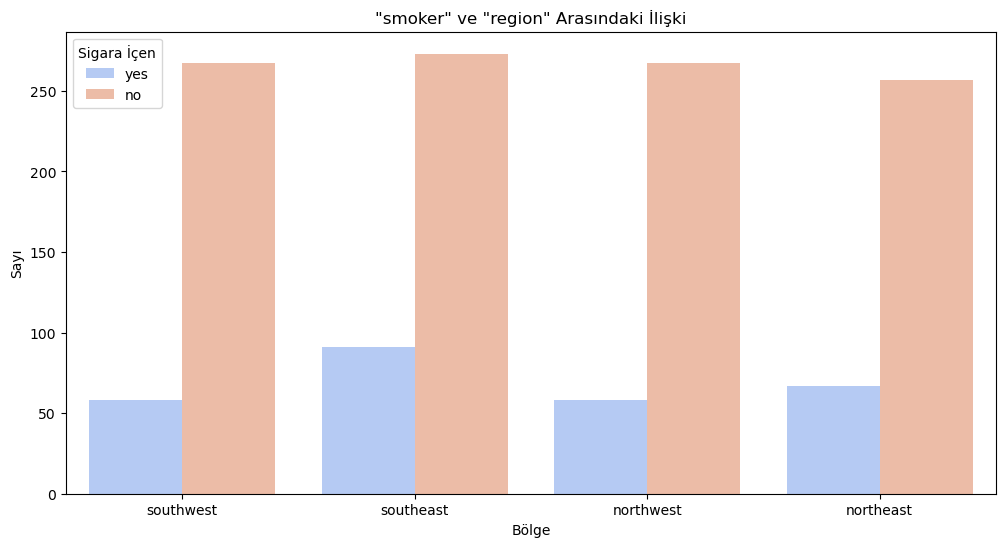

In [24]:
plt.figure(figsize=(12, 6))
sn.countplot(x='region', hue='smoker', data=df, palette="coolwarm")
plt.title('"smoker" ve "region" Arasındaki İlişki')
plt.xlabel('Bölge')
plt.ylabel('Sayı')
plt.legend(title='Sigara İçen')
plt.show()

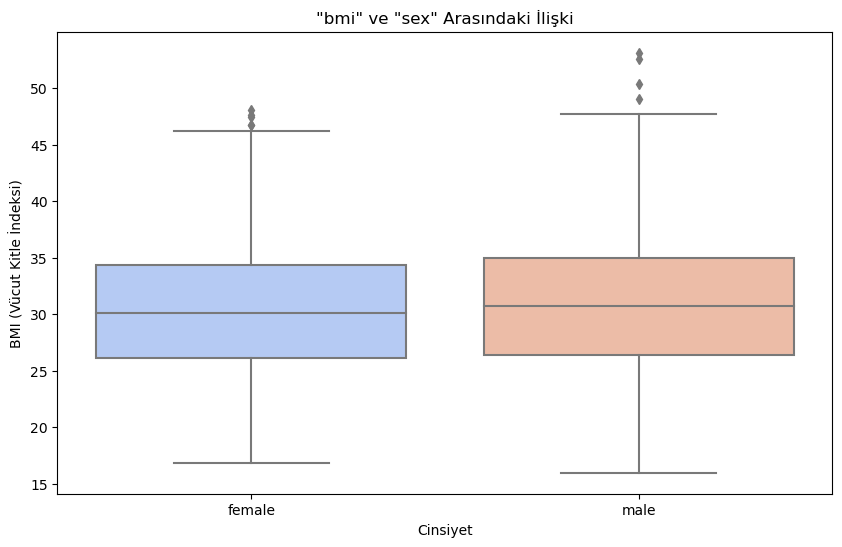

In [26]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='sex', y='bmi', data=df, palette="coolwarm")
plt.title('"bmi" ve "sex" Arasındaki İlişki')
plt.xlabel('Cinsiyet')
plt.ylabel('BMI (Vücut Kitle İndeksi)')
plt.show()

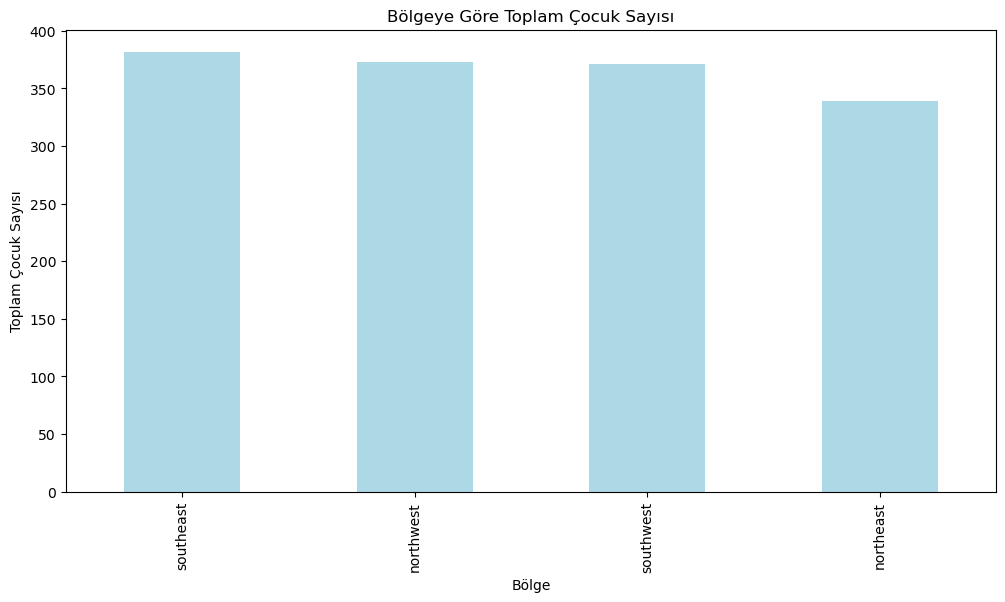

In [28]:
region_children_sum = df.groupby('region')['children'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
region_children_sum.plot(kind='bar', color='lightblue')
plt.title('Bölgeye Göre Toplam Çocuk Sayısı')
plt.xlabel('Bölge')
plt.ylabel('Toplam Çocuk Sayısı')
plt.show()

<Figure size 1200x600 with 0 Axes>

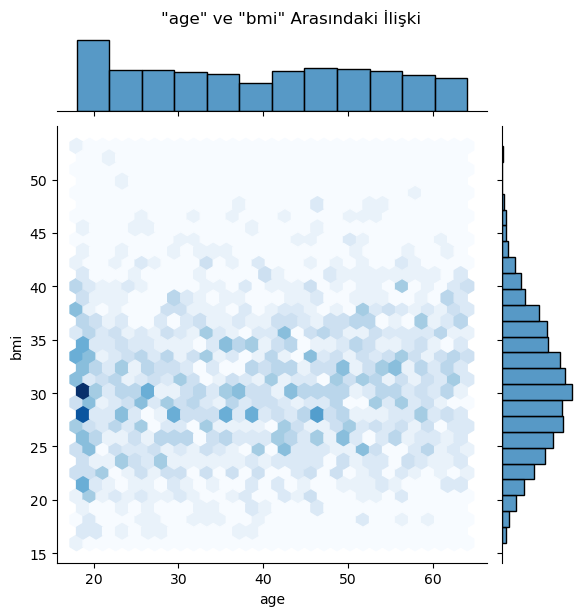

In [31]:
import matplotlib.pyplot as plt

# Hexbin plot ile ilişkiyi görselleştirin
plt.figure(figsize=(12, 6))
sn.jointplot(x='age', y='bmi', data=df, kind='hex', cmap="Blues", gridsize=30)
plt.suptitle('"age" ve "bmi" Arasındaki İlişki', y=1.02)
plt.show()


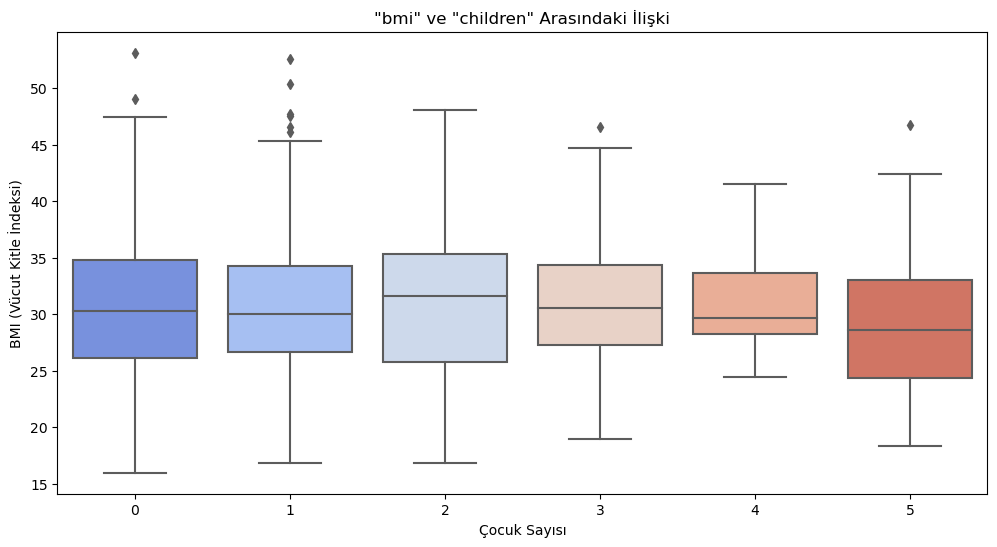

In [32]:
plt.figure(figsize=(12, 6))
sn.boxplot(x='children', y='bmi', data=df, palette="coolwarm")
plt.title('"bmi" ve "children" Arasındaki İlişki')
plt.xlabel('Çocuk Sayısı')
plt.ylabel('BMI (Vücut Kitle İndeksi)')
plt.show()

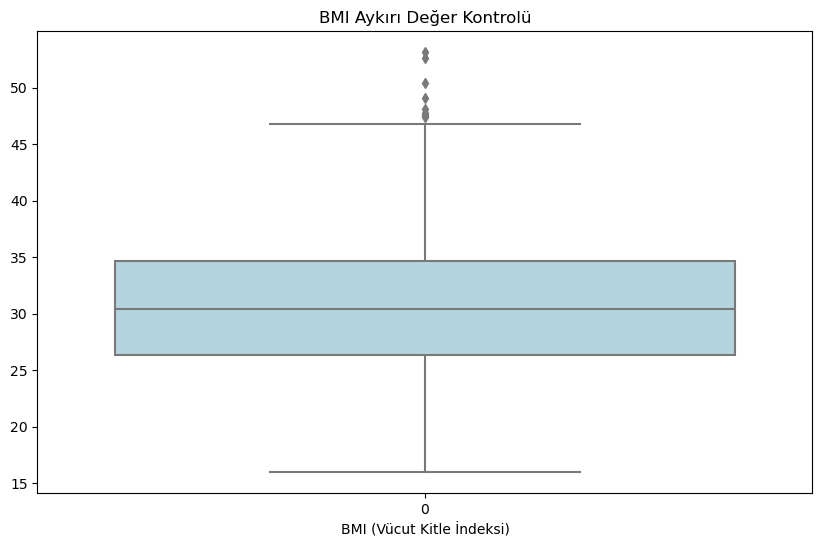

In [33]:
plt.figure(figsize=(10, 6))
sn.boxplot(df['bmi'], color='lightblue')
plt.title('BMI Aykırı Değer Kontrolü')
plt.xlabel('BMI (Vücut Kitle İndeksi)')
plt.show()

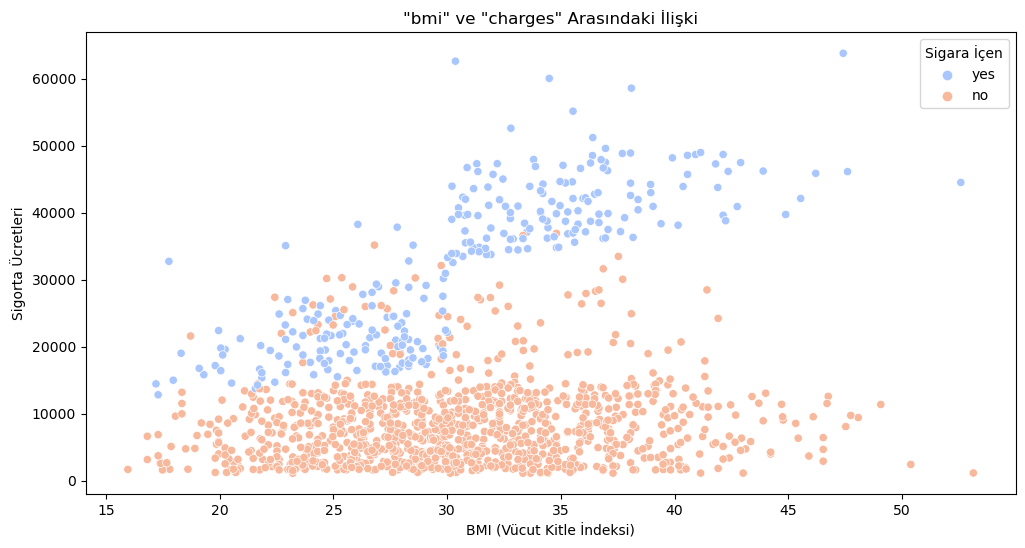

In [34]:
plt.figure(figsize=(12, 6))
sn.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette="coolwarm")
plt.title('"bmi" ve "charges" Arasındaki İlişki')
plt.xlabel('BMI (Vücut Kitle İndeksi)')
plt.ylabel('Sigorta Ücretleri')
plt.legend(title='Sigara İçen')
plt.show()

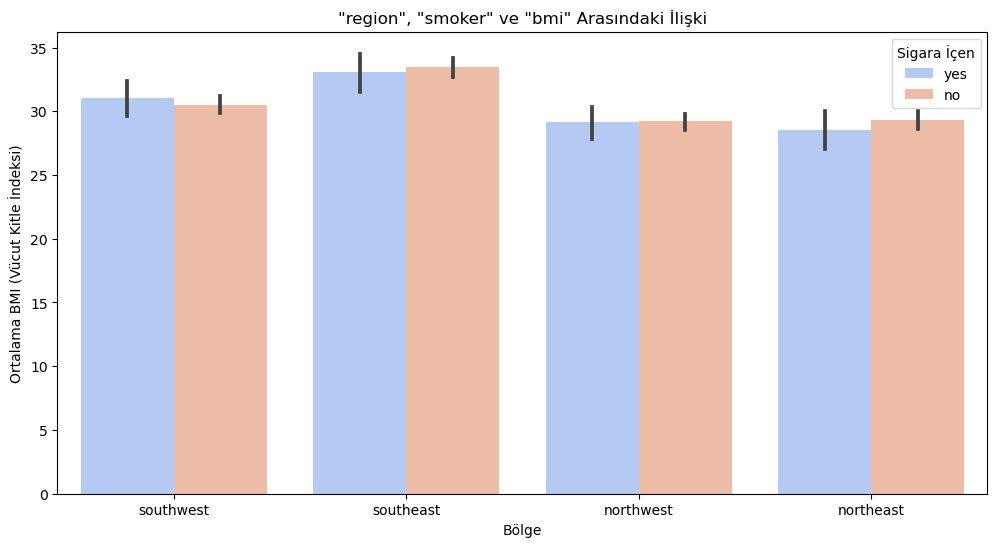

In [35]:
plt.figure(figsize=(12, 6))
sn.barplot(x='region', y='bmi', hue='smoker', data=df, palette="coolwarm")
plt.title('"region", "smoker" ve "bmi" Arasındaki İlişki')
plt.xlabel('Bölge')
plt.ylabel('Ortalama BMI (Vücut Kitle İndeksi)')
plt.legend(title='Sigara İçen')
plt.show()

VERİ ÖN İŞLEME

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

df = pd.get_dummies(df, columns=['region'], drop_first=True)


In [40]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


TEST VERİSİ AYIRMA 

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
X_train_scaled

array([[ 0.47222651, -1.0246016 , -1.75652513, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.0246016 , -1.03308239, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.8987451 , -1.0246016 , -0.94368672, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16755139, -1.0246016 ,  2.82086429, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.1120044 ,  0.97598911, -0.10932713, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Modelleri tanımlama
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [54]:
from sklearn.model_selection import cross_val_score

# Modellerin performansını çapraz doğrulama ile değerlendirme
model_scores = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    model_scores[model_name] = -cv_scores.mean()  # We use negative MSE because by convention higher score is better.

In [56]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{model_name} MSE Scores: {-cv_scores}")
    print(f"{model_name} Average MSE: {-cv_scores.mean()}")
    print("-" * 50)

Linear Regression MSE Scores: [40131832.90918392 32077034.53122964 35910188.22467399 46590418.12240702
 35029981.4566462 ]
Linear Regression Average MSE: 37947891.048828155
--------------------------------------------------
Ridge Regression MSE Scores: [40129743.00577582 32087092.88679603 35901560.97641087 46570073.14358745
 35042210.16627237]
Ridge Regression Average MSE: 37946136.0357685
--------------------------------------------------
Lasso Regression MSE Scores: [40128250.7725492  32075541.06409054 35909598.70351581 46588797.66104925
 35030915.47273283]
Lasso Regression Average MSE: 37946620.734787524
--------------------------------------------------
Decision Tree Regressor MSE Scores: [43880158.18506808 40070875.168498   51694674.897506   46460560.82625411
 37436593.26086668]
Decision Tree Regressor Average MSE: 43908572.46763857
--------------------------------------------------
Random Forest Regressor MSE Scores: [25896534.06501915 16629094.91587103 26517589.54650183 30061156

In [57]:
best_model_name = min(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]

print(f"En iyi model: {best_model_name} with MSE: {best_model_score}")

En iyi model: Random Forest Regressor with MSE: 24826862.830152873


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor için hiperparametre değer aralıklarını belirleme
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid Search için modeli tanımlama
rf = RandomForestRegressor()

# Grid Search yapısını oluşturma
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Grid Search ile en iyi hiperparametre kombinasyonunu bulma
grid_search.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri yazdırma
best_params = grid_search.best_params_
print(f"En iyi hiperparametreler: {best_params}")


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optimize edilmiş modeli al
best_rf = grid_search.best_estimator_

# Modeli test verisi üzerinde tahmin yapmak için kullanma
y_pred = best_rf.predict(X_test_scaled)

# Ortalama Karesel Hata (Mean Squared Error - MSE)
mse = mean_squared_error(y_test, y_pred)

# Ortalama Mutlak Hata (Mean Absolute Error - MAE)
mae = mean_absolute_error(y_test, y_pred)

# R^2 skoru
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Karesel Hata (MSE): {mse}")
print(f"Ortalama Mutlak Hata (MAE): {mae}")
print(f"R^2 Skoru: {r2}")

Ortalama Karesel Hata (MSE): 18932037.963882383
Ortalama Mutlak Hata (MAE): 2444.800631193906
R^2 Skoru: 0.8780535094749835
